# 2.1:  Computer Tomography: Forward Transform
Gruppe: Gabriel Wolf und Jakob Scheiber

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt a: Winkelbereich und Definitionsbereiche

Zuerst ist der Bereich, in dem $\varphi$ sein kann, gesucht. 

Mit einem Blick auf die Grafik 1 in der Angabe wird klar das sich der Winkel

zwischen 0° und exklusive 180° befinden kann.

Somit folgt $\varphi \in [0;180)$°

Wenn das Foto, bzw der Datensatz die Dimensionen M x N hat kann $\epsilon$ (also die Position entlang des Detektors)
 
 sich zwischen $-\frac{N}{2}$ und $+\frac{N}{2}$ hin und her schieben, also die Gesamte Bildbreite.

Somit folgt $\epsilon \in [-\frac{N}{2} ; \frac{N}{2}  ]$

Analog gilt das auch für $\eta$, nur muss hier bedacht werden, dass $\eta$ auch quer übers ganze Bild bzw. Körper zeigen kann.

Also folgt ganz einfach mit Geometrie $ \eta \in [ -\tfrac{1}{2}\sqrt{M^2 + N^2} ; \tfrac{1}{2}\sqrt{M^2 + N^2}]$


### Unterpunkt b: Evaluate Projections

In [3]:
data =np.loadtxt("Data/ring.txt", delimiter=',') 
print(data.shape) #ahh okay
M = data.shape[0] 
N= data.shape[1]

ksi_interval = np.linspace(-N/2 ,N/2 ,N) 
eta_interval = np.linspace(-np.sqrt((M**2)+(N**2))/2, np.sqrt((M**2)+(N**2))/2 ,M) 
phi_interval = np.linspace(0, 1*np.pi, 180)

p_phi = np.zeros((len(phi_interval),len(ksi_interval))) #p array erzeugen
delta_eta = eta_interval[1] - eta_interval[0]

cx = (N-1) / 2.0 #center x
cy = (M-1) / 2.0  #center y

#forward transform
for p in range(len(phi_interval)):
    phi = phi_interval[p]
    for i in range(N):
        ksi= ksi_interval[i]
        sum = 0
        for j in range(M):
            eta= eta_interval[j]
            x= ksi*np.cos(phi) - eta*np.sin(phi)
            y= ksi*np.sin(phi) + eta*np.cos(phi)
            x_int = int(np.round(x + cx)) 
            y_int = int(np.round(y + cy))
            if 0 <= x_int < N and 0 <= y_int < M:
                sum= sum+data[y_int,x_int]
            
        p_phi[p,i] = sum*delta_eta

(360, 360)


### Unterpunkt c: Plotting

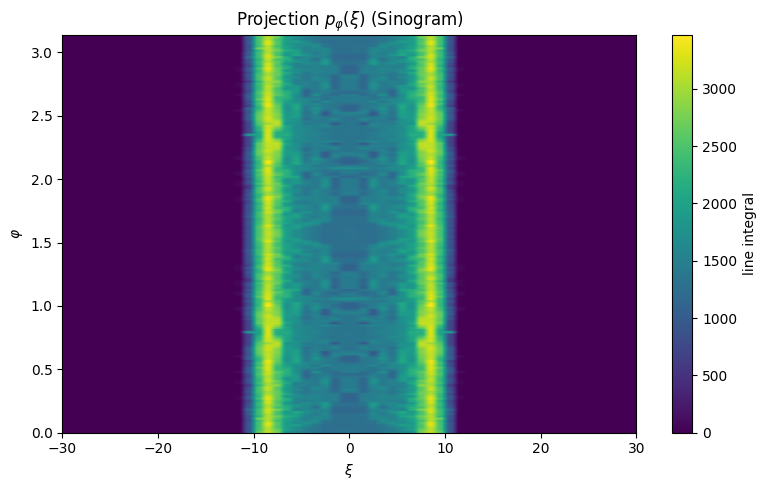

In [4]:
plt.figure(figsize=(8,5))
plt.imshow(
    p_phi,
    extent=[ksi_interval[0], ksi_interval[-1], phi_interval[0], phi_interval[-1]],
    aspect='auto',
    origin='lower',
    cmap='viridis'
)
plt.xlabel(r'$\xi$')
plt.xlim(-30,30) # ranzoomen
plt.ylabel(r'$\varphi$')
plt.title(r'Projection $p_{\varphi}(\xi)$ (Sinogram)')
cbar = plt.colorbar()
cbar.set_label('line integral')
plt.tight_layout()
plt.show()

### Unterpunkt e: Fourier components F (kξ cos φ, kξ sin φ)


In [5]:
delta_ksi = ksi_interval[1] - ksi_interval[0]
N_phi = len(phi_interval)
N_ksi = len(ksi_interval)


m = np.arange(-N_ksi//2, N_ksi//2, dtype=float) # Frequenzindizes
k = (2*np.pi / (N_ksi * delta_ksi)) * m    # Berechnet Wellenzahl k für alle m

# Fouriertransformation, Integral als Riemansumme schreiben so wie in Aufgabe b
# e^{i...} Term
E = np.exp(1j * np.outer(k, ksi_interval))  # np.outer erzeugt Matrix mit einträgen k*ksi
F_phi = (E @ (p_phi.T * delta_ksi)).T       # Riemansumme für alle phi gleichzeitig


cosphi = np.cos(phi_interval)[:, None]
sinphi = np.sin(phi_interval)[:, None]

kx = k[None, :] * cosphi    
ky = k[None, :] * sinphi    

### Unterpunkt f: Plot

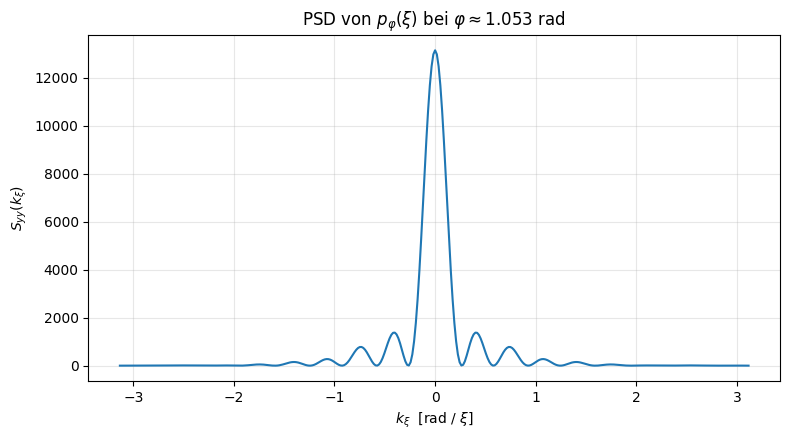

In [6]:
# phi wählen
p = 60                                  
y = p_phi[p, :]   # p_phi bei festem phi als Funktion von ksi
n = y.size        # n ist Anzahl der ksi-Werte (hier n=N=360) aber eigenen Variblennamen falls man ändern will


delta_ksi = ksi_interval[1] - ksi_interval[0]
m = np.arange(-n//2, n//2, dtype=float)      
kxi = (2.0*np.pi/(n*delta_ksi)) * m              # kξ in rad/ξ

# Fourier-Transformierte F(kξ) von y(ξ) mittels Riemann-Summe
E = np.exp(1j * np.outer(kxi, ksi_interval))         
F_kxi = E @ (y * delta_ksi)                          


S = (np.abs(F_kxi)**2) / (n**2)                 


plt.figure(figsize=(8,4.5))
plt.plot(kxi, S)
plt.xlabel(r'$k_\xi$  [rad / $\xi$]')
plt.ylabel(r'$S_{yy}(k_\xi)$')
plt.title(rf'PSD von $p_\varphi(\xi)$ bei $\varphi \approx {phi_interval[p]:.3f}$ rad')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
